# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import matplotlib
%matplotlib inline

from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [3]:
from trainer import Trainer
from tracker import TrackerFactory
from agent import AgentFactory

agent_factory = AgentFactory()
tracker_factory = TrackerFactory()

trainer = Trainer(env, agent_factory, tracker_factory)
trainer.describe_environment()


Seed:  1
Brain names:  ['ReacherBrain']
{'ReacherBrain': <unityagents.brain.BrainParameters object at 0x7f51e0cdc7f0>}
Number of agents: 1
Size of each action: 4
Type of action space: continuous
There are 1 agents. Each observes a state with length: 33 and takes an action of size 4
Type of state space: continuous
State vector type:  (33,)
The state for the first agent looks like:
 [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


Agent is using:  cuda:0


/home/safdar/anaconda3/envs/drl/lib/python3.6/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode :: 0	Scores:	Centennial: nan	Mean: 0.000	Min: 0.000	Max:0.000	Duration: 1.00s


/home/safdar/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/safdar/.local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


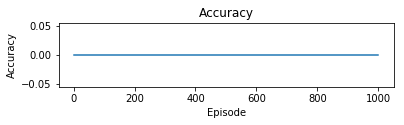

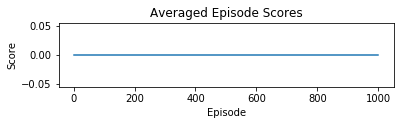

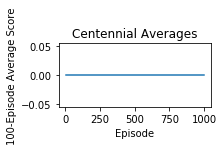

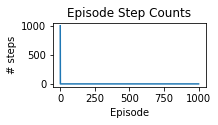

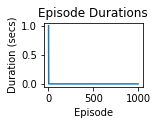

/data/code/nd/deep-learning/reinforced/DRL-Continuous-Control/agent.py:146: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode :: 1	Scores:	Centennial: 0.000	Mean: 0.000	Min: 0.000	Max:0.000	Duration: 6.00s
Episode :: 2	Scores:	Centennial: 0.000	Mean: 1.640	Min: 1.640	Max:1.640	Duration: 6.00s
Episode :: 3	Scores:	Centennial: 0.547	Mean: 0.230	Min: 0.230	Max:0.230	Duration: 6.00s
Episode :: 4	Scores:	Centennial: 0.467	Mean: 1.090	Min: 1.090	Max:1.090	Duration: 6.00s
Episode :: 5	Scores:	Centennial: 0.592	Mean: 0.570	Min: 0.570	Max:0.570	Duration: 6.00s
Episode :: 6	Scores:	Centennial: 0.588	Mean: 0.690	Min: 0.690	Max:0.690	Duration: 6.00s
Episode :: 7	Scores:	Centennial: 0.603	Mean: 1.070	Min: 1.070	Max:1.070	Duration: 6.00s
Episode :: 8	Scores:	Centennial: 0.661	Mean: 0.990	Min: 0.990	Max:0.990	Duration: 6.00s
Episode :: 9	Scores:	Centennial: 0.698	Mean: 0.330	Min: 0.330	Max:0.330	Duration: 6.00s
Episode :: 10	Scores:	Centennial: 0.661	Mean: 1.740	Min: 1.740	Max:1.740	Duration: 6.00s


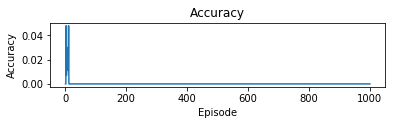

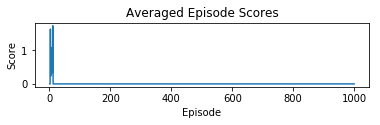

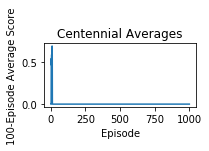

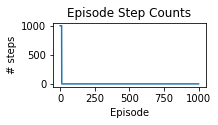

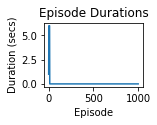

Episode :: 11	Scores:	Centennial: 0.759	Mean: 0.830	Min: 0.830	Max:0.830	Duration: 6.00s
Episode :: 12	Scores:	Centennial: 0.765	Mean: 0.690	Min: 0.690	Max:0.690	Duration: 6.00s
Episode :: 13	Scores:	Centennial: 0.759	Mean: 0.430	Min: 0.430	Max:0.430	Duration: 6.00s
Episode :: 14	Scores:	Centennial: 0.736	Mean: 0.340	Min: 0.340	Max:0.340	Duration: 6.00s
Episode :: 15	Scores:	Centennial: 0.709	Mean: 1.340	Min: 1.340	Max:1.340	Duration: 7.00s
Episode :: 16	Scores:	Centennial: 0.749	Mean: 1.020	Min: 1.020	Max:1.020	Duration: 7.00s
Episode :: 17	Scores:	Centennial: 0.765	Mean: 0.590	Min: 0.590	Max:0.590	Duration: 7.00s
Episode :: 18	Scores:	Centennial: 0.755	Mean: 1.010	Min: 1.010	Max:1.010	Duration: 7.00s
Episode :: 19	Scores:	Centennial: 0.768	Mean: 0.590	Min: 0.590	Max:0.590	Duration: 7.00s
Episode :: 20	Scores:	Centennial: 0.759	Mean: 0.770	Min: 0.770	Max:0.770	Duration: 7.00s


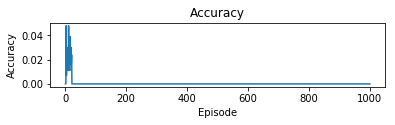

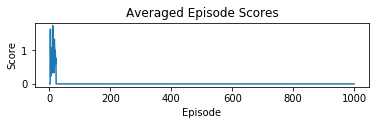

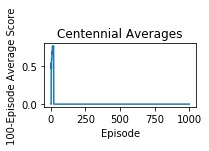

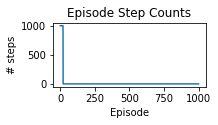

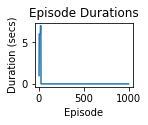

Episode :: 21	Scores:	Centennial: 0.760	Mean: 1.150	Min: 1.150	Max:1.150	Duration: 7.00s
Episode :: 22	Scores:	Centennial: 0.778	Mean: 1.280	Min: 1.280	Max:1.280	Duration: 7.00s
Episode :: 23	Scores:	Centennial: 0.800	Mean: 1.050	Min: 1.050	Max:1.050	Duration: 7.00s
Episode :: 24	Scores:	Centennial: 0.810	Mean: 0.270	Min: 0.270	Max:0.270	Duration: 7.00s
Episode :: 25	Scores:	Centennial: 0.788	Mean: 1.620	Min: 1.620	Max:1.620	Duration: 7.00s
Episode :: 26	Scores:	Centennial: 0.820	Mean: 2.380	Min: 2.380	Max:2.380	Duration: 7.00s
Episode :: 27	Scores:	Centennial: 0.878	Mean: 0.910	Min: 0.910	Max:0.910	Duration: 7.00s
Episode :: 28	Scores:	Centennial: 0.879	Mean: 1.490	Min: 1.490	Max:1.490	Duration: 7.00s
Episode :: 29	Scores:	Centennial: 0.900	Mean: 0.000	Min: 0.000	Max:0.000	Duration: 7.00s
Episode :: 30	Scores:	Centennial: 0.870	Mean: 5.410	Min: 5.410	Max:5.410	Duration: 7.00s


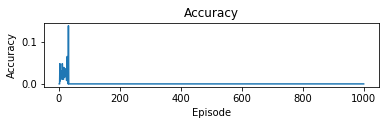

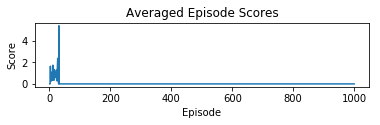

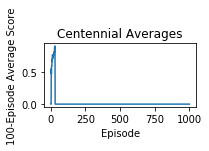

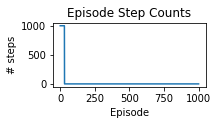

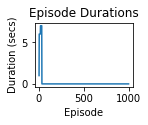

Episode :: 31	Scores:	Centennial: 1.017	Mean: 1.270	Min: 1.270	Max:1.270	Duration: 7.00s
Episode :: 32	Scores:	Centennial: 1.025	Mean: 2.410	Min: 2.410	Max:2.410	Duration: 7.00s
Episode :: 33	Scores:	Centennial: 1.067	Mean: 1.880	Min: 1.880	Max:1.880	Duration: 7.00s
Episode :: 34	Scores:	Centennial: 1.091	Mean: 2.940	Min: 2.940	Max:2.940	Duration: 7.00s
Episode :: 35	Scores:	Centennial: 1.143	Mean: 3.060	Min: 3.060	Max:3.060	Duration: 7.00s
Episode :: 36	Scores:	Centennial: 1.197	Mean: 3.430	Min: 3.430	Max:3.430	Duration: 7.00s
Episode :: 37	Scores:	Centennial: 1.257	Mean: 1.210	Min: 1.210	Max:1.210	Duration: 7.00s
Episode :: 38	Scores:	Centennial: 1.256	Mean: 3.910	Min: 3.910	Max:3.910	Duration: 7.00s
Episode :: 39	Scores:	Centennial: 1.324	Mean: 3.620	Min: 3.620	Max:3.620	Duration: 7.00s
Episode :: 40	Scores:	Centennial: 1.381	Mean: 1.490	Min: 1.490	Max:1.490	Duration: 7.00s


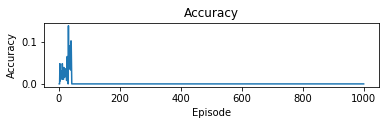

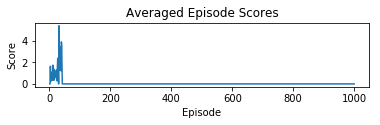

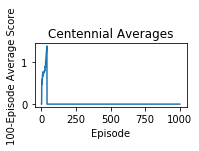

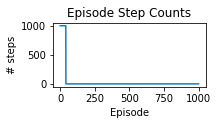

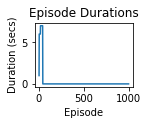

Episode :: 41	Scores:	Centennial: 1.384	Mean: 1.130	Min: 1.130	Max:1.130	Duration: 7.00s
Episode :: 42	Scores:	Centennial: 1.378	Mean: 1.630	Min: 1.630	Max:1.630	Duration: 7.00s
Episode :: 43	Scores:	Centennial: 1.384	Mean: 0.480	Min: 0.480	Max:0.480	Duration: 7.00s
Episode :: 44	Scores:	Centennial: 1.363	Mean: 5.360	Min: 5.360	Max:5.360	Duration: 7.00s
Episode :: 45	Scores:	Centennial: 1.452	Mean: 1.350	Min: 1.350	Max:1.350	Duration: 7.00s
Episode :: 46	Scores:	Centennial: 1.450	Mean: 0.760	Min: 0.760	Max:0.760	Duration: 7.00s
Episode :: 47	Scores:	Centennial: 1.435	Mean: 1.350	Min: 1.350	Max:1.350	Duration: 7.00s
Episode :: 48	Scores:	Centennial: 1.433	Mean: 1.150	Min: 1.150	Max:1.150	Duration: 7.00s
Episode :: 49	Scores:	Centennial: 1.428	Mean: 0.460	Min: 0.460	Max:0.460	Duration: 7.00s
Episode :: 50	Scores:	Centennial: 1.408	Mean: 1.350	Min: 1.350	Max:1.350	Duration: 7.00s


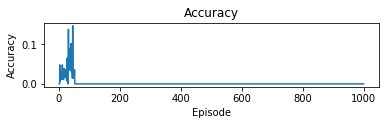

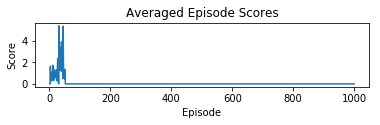

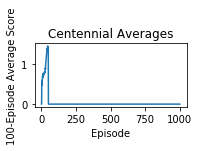

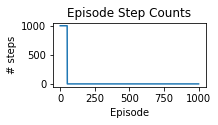

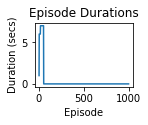

Episode :: 51	Scores:	Centennial: 1.407	Mean: 1.990	Min: 1.990	Max:1.990	Duration: 7.00s
Episode :: 52	Scores:	Centennial: 1.418	Mean: 2.320	Min: 2.320	Max:2.320	Duration: 7.00s


In [ ]:
tracker = trainer.train_single(n_episodes=1000, plot_every=10, learn_every=20, iterations_per_learn=10)


In [ ]:
tracker.plot_performance()